# Project: Investigation into Factors Effecting Improved Quality of Life in the Least Developed Countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

It has been a goal of many people in the developed world to help the least developed countries improve the quality of life for the people living there. However, it is typically difficult to determine how is the best way to provide assistance, and what measures should be used to determine succcess.

This investigation looks over a couple of potential measure of success - Annual income per person, and percentage of children completing primary school. These measures are looked at to determine if there appears to be a correlation between them, as well as looking at some specific qualities of each.

As there are a multitude of potential factors which could bring about a positive change, this investigation only looks at a couple: Electricy usage per person and access to improved (i.e. clean) drinking water. The general assumption is that if people had reliable access to electricity or clean drinking water, there would be an increase in school attendance and ultimately GDP.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties - Measures

The next three cells will read the .csv files related to potential measures of successful education. GDP per Capita will show the overall progress of a country, while the percentage completing primary school is a good indication of the ability of a country to educate their children.

In [4]:
gdp_df = pd.read_csv('GDPperCapita.csv')
gdp_df.name = 'GDP Dataframe'
gdp_df.head(2)

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
school_female_df = pd.read_csv('PrimarySchoolFemale.csv')
school_female_df.name = 'School (Female) Dataframe'
school_female_df.head(2)

,Primary school completion (% of girls),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,4.19285,NaN,NaN,5.14529,5.91965,...,NaN,NaN,NaN,18.74188,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
school_male_df = pd.read_csv('PrimarySchoolMale.csv')
school_male_df.name = 'School (Male) Dataframe'
school_male_df.head(2)

,"Primary completion rate, male (% of relevant age group)",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,26.23178,NaN,NaN,26.73849,29.07336,...,NaN,NaN,NaN,48.3607,NaN,NaN,NaN,NaN,NaN,NaN


### General Properties - Factors

The next few cells will load the .csv files with the potential factors which would contribute to the above measures. These datasets will help illustrate the change in electricity consumption per person, and the proportion of the population with access to clean drinking water. The clean drinking water datasets are broken up between rural and urban populations.

In [7]:
elec_df = pd.read_csv('ElecperCapita.csv')
elec_df.name = 'Electricity Dataframe'
elec_df.head(2)

,"Residential electricity consumption, per person (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,642.488584,709.142300,689.175757,875.172324,853.940372,787.490431,767.164192,552.078818,575.019962,636.341383
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352.802182,372.683343,390.132055,409.794778,451.494726,465.453035,532.712319,504.219323,531.577538,590.509814


In [8]:
water_rural_df = pd.read_csv('CleanWaterRural.csv')
water_rural_df.name = 'Water (Rural) Dataframe'
water_rural_df.head(2)

,"Proportion of the population using improved drinking water sources, rural",1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1.0,1.0,1.0,1.0,1.0,4.0,8.0,11.0,15.0,...,22.0,25.0,28.0,32.0,35.0,39.0,42.0,42.0,42.0,42.0


In [9]:
water_urban_df = pd.read_csv('CleanWaterUrban.csv')
water_urban_df.name = 'Water (Urban) Dataframe'
water_urban_df.head(2)

,"Proportion of the population using improved drinking water sources, urban",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,6.0,6.0,6.0,6.0,6.0,12.0,18.0,24.0,...,42.0,48.0,54.0,60.0,66.0,72.0,78.0,78.0,78.0,78.0


In [10]:
# Check the shape of each dataframe to determine the number of rows (countries) and columns (years).
def print_shape(df):
    print('The shape of the {} is: {}'.format(df.name, df.shape))
    return
print_shape(gdp_df)
print_shape(school_female_df)
print_shape(school_male_df)
print_shape(elec_df)
print_shape(water_rural_df)
print_shape(water_urban_df)

The shape of the GDP Dataframe is: (275, 53)
The shape of the School (Female) Dataframe is: (275, 43)
The shape of the School (Male) Dataframe is: (275, 43)
The shape of the Electricity Dataframe is: (136, 50)
The shape of the Water (Rural) Dataframe is: (270, 21)
The shape of the Water (Urban) Dataframe is: (270, 22)


From the shape of each dataframe listed above, we can see that elec_df contains roughly half the number of countries as the other dataframes, and that two water dataframes only have data for half of the number of years. For now, this difference is noted and will be factored into the further analysis below.

In [11]:
# Confirm that there are no duplicate rows in each dataframe.
print('gdp_df duplicates: {}'.format(sum(gdp_df.duplicated())))
print('school_female_df duplicates: {}'.format(sum(school_female_df.duplicated())))
print('school_male_df duplicates: {}'.format(sum(school_male_df.duplicated())))
print('elec_df duplicates: {}'.format(sum(elec_df.duplicated())))
print('water_rural_df duplicates: {}'.format(sum(water_rural_df.duplicated())))
print('water_urban_df duplicates: {}'.format(sum(water_urban_df.duplicated())))

gdp_df duplicates: 0
school_female_df duplicates: 0
school_male_df duplicates: 0
elec_df duplicates: 0
water_rural_df duplicates: 0
water_urban_df duplicates: 0


### Data Cleaning

In [50]:
# As the Countries column in each dataframe has a title the explains the purpose of the content, we will change it to
#    'country' to be more specific, and common across the dataframes.
gdp_df.rename(columns={'Income per person (fixed 2000 US$)': 'country'}, inplace=True)
school_female_df.rename(columns={'Primary school completion (% of girls)': 'country'}, inplace=True)
school_male_df.rename(columns={'Primary completion rate, male (% of relevant age group)': 'country'}, inplace=True)
elec_df.rename(columns={'Residential electricity consumption, per person (kWh)': 'country'}, inplace=True)
water_rural_df.rename(columns={'Proportion of the population using improved drinking water sources, rural': 'country'}, inplace=True)
water_urban_df.rename(columns={'Proportion of the population using improved drinking water sources, urban': 'country'}, inplace=True)

 We want to look at the least developed countries only, as those will be the ones most likely to receive aid in some form. We can define the least developed countries as those in the lower 25% of GDP. Therefore, we will filter the gdp_df to only those countries in lower 25% GDP, based on the last year in the data set. Additional cleaning of the other dataframes will be based off of the revised gdp_df datafram.

In [51]:
gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,96.000000,97.000000,97.000000,97.000000,97.000000,103.000000,105.000000,106.000000,107.000000,107.000000,...,195.000000,195.000000,194.000000,194.000000,193.000000,193.000000,191.000000,189.000000,182.000000,175.000000
mean,2862.692195,2936.271369,3033.697747,3127.397267,3297.171464,3479.098233,3561.800465,3643.836068,3827.447920,4014.630286,...,7983.084448,8113.092660,8335.349531,8545.104221,8898.582041,9219.106697,8999.106190,8463.079022,7699.995854,7603.241430
std,3966.169477,4078.453837,4209.541510,4322.069500,4603.806933,4686.086119,4885.065722,5088.097078,5226.637333,5462.190047,...,12730.751887,12804.769377,13171.168298,13440.153561,14003.742573,14664.833399,14702.224566,14079.334478,11280.297478,10906.851828
min,98.634845,77.662309,72.324927,77.867365,88.130052,100.137524,107.805084,99.080123,92.569121,105.288508,...,83.081859,85.282625,88.243053,92.367256,94.769735,97.910183,101.103851,101.169007,105.531738,109.809298
25%,348.092860,367.165347,347.301046,362.828560,371.591692,391.167669,420.366839,409.926541,427.755618,443.355777,...,606.407609,605.896769,629.447328,628.411890,640.762816,673.004691,686.624839,705.007574,676.924076,650.652354
50%,962.840433,963.113762,976.188701,1045.780232,1064.991250,1091.500026,1111.158861,1150.518305,1238.791051,1261.364518,...,2040.248192,2129.193396,2206.522493,2284.186697,2404.736431,2494.352654,2510.278480,2527.938377,2459.478864,2522.824763
75%,3475.484109,3744.356202,3961.399895,4071.375675,4238.361138,5029.630414,5114.437182,5257.801228,5612.126561,6066.936702,...,9537.855880,9415.266271,9414.557553,9655.998281,10264.674280,10714.744220,10447.748978,9294.355996,9019.537452,9077.125442
max,19588.612700,20009.625800,20410.612690,20153.284930,21842.810220,22334.443480,25091.732050,27876.079660,27925.907810,28350.643200,...,77348.898740,78229.939810,80255.753890,81827.956120,85942.671130,98397.089860,108111.212800,105147.437700,63036.360610,52056.017810


In [52]:
# From the above, the lowest 25% of countries GDP are below:
lower_25 = 650.6522354

In [53]:
# Create a new dataframe from the gdp_df that only contains the countries in the lower 25% of GDP, then display the
#    shape to see how many rows (i.e countries) it contains.
filter_gdp_df = gdp_df.loc[gdp_df['2011'] <= lower_25]
filter_gdp_df.name = 'GDP (filtered) Dataframe'
print_shape(filter_gdp_df)

The shape of the GDP (filtered) Dataframe is: (44, 53)


In [54]:
# Create a list of the countries from the filter_gdp_df. This will be used to filter the other dataframes so that
#    all contain the same filtered set of countries.
countries = filter_gdp_df['country'].tolist()

In [55]:
# Filter each of the other dataframes by the same list of counties. This will allow a consistent set of countries to
#    compare.
filter_school_female_df = school_female_df[school_female_df['country'].isin(countries)]
filter_school_female_df.name = 'School (Female Filtered) Dataframe'
filter_school_male_df = school_male_df[school_male_df['country'].isin(countries)]
filter_school_male_df.name = 'School (Male Filtered) Dataframe'
filter_elec_df = elec_df[elec_df['country'].isin(countries)]
filter_elec_df.name = 'Electricity (Filtered) Dataframe'
filter_water_urban_df = water_urban_df[water_urban_df['country'].isin(countries)]
filter_water_urban_df.name = 'Water (Urban Filtered) Dateframe'
filter_water_rural_df = water_rural_df[water_rural_df['country'].isin(countries)]
filter_water_rural_df.name = 'Water (Rural Filtered) Dateframe'

In [57]:
# Check the dimensions of each dataframe.
print_shape(filter_gdp_df)
print_shape(filter_school_female_df)
print_shape(filter_school_male_df)
print_shape(filter_elec_df)
print_shape(filter_water_rural_df)
print_shape(filter_water_urban_df)

The shape of the GDP (filtered) Dataframe is: (44, 53)
The shape of the School (Female Filtered) Dataframe is: (44, 43)
The shape of the School (Male Filtered) Dataframe is: (44, 43)
The shape of the Electricity (Filtered) Dataframe is: (22, 50)
The shape of the Water (Rural Filtered) Dateframe is: (44, 21)
The shape of the Water (Urban Filtered) Dateframe is: (44, 22)


In [18]:
# Fill in any missing data by interpolation. This will keep trends consistent between countries throughout the years.
filter_gdp_df = filter_gdp_df.interpolate()

In [19]:
# Check to see what the filter_gdp_df dataframe looks like.
filter_gdp_df

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,329.565594,328.777995,353.231466,404.270302,473.136343,562.987685,622.566879,619.818580,623.245275,629.955306
18,Bangladesh,254.825079,262.765635,269.532073,260.929896,281.264386,277.273311,275.387064,261.367787,277.183263,...,385.806043,399.395957,417.953684,436.688183,459.862514,483.970868,508.555772,532.076999,558.062385,588.369178
23,Benin,256.978767,261.647222,249.212531,257.204865,270.122942,279.890894,285.098991,283.218290,288.837583,...,356.605231,358.774753,358.246398,357.250070,360.655411,366.044966,373.506687,376.621623,377.044301,378.051791
33,Burkina Faso,122.207837,125.226678,130.884927,127.229469,128.049627,130.640003,129.029762,137.840956,139.389332,...,223.995232,235.146023,239.011951,252.214719,261.480505,263.014927,270.124860,269.970647,282.696937,285.803026
34,Burundi,116.009861,98.311239,105.372971,107.837550,112.581490,114.920646,117.924234,131.571570,128.669989,...,133.774805,128.607793,130.979018,128.296116,131.171659,133.286878,135.862446,136.661280,138.248238,140.812504
35,Cambodia,235.916309,232.738293,226.337009,223.176122,225.782612,225.205057,224.373707,235.338067,232.673438,...,327.887501,350.888985,382.190326,427.529253,468.031827,510.019766,538.133455,532.617523,557.976913,590.452112
40,Central African Republic,355.822758,367.165347,347.301046,338.514694,338.983734,335.489469,330.823180,339.104565,336.676887,...,238.786204,218.363140,217.075528,218.656139,223.097453,227.270618,227.602990,227.174907,229.581397,232.623253
41,Chad,253.944175,252.093694,259.947164,250.305059,238.816148,235.201680,226.176523,223.263211,217.683294,...,189.990114,210.276283,271.474077,308.400900,299.880093,292.143465,283.275027,272.625503,300.106154,301.401709
48,Comoros,289.423671,267.197695,296.674218,295.992695,281.654690,277.001655,278.526753,270.760479,270.081796,...,366.299922,365.444815,354.895703,360.070787,354.838755,347.100033,341.215991,338.297902,336.481639,335.219235
49,"Congo, Dem. Rep.",324.903166,282.301696,333.401271,341.680331,324.493232,318.801629,330.876984,318.257746,322.480298,...,83.081859,85.282625,88.243053,92.367256,94.769735,97.910183,101.103851,101.169007,105.531738,109.809298


In [20]:
# Drop Angola from the filter_gdp_df dataframe, as it is the source of remaining Null values.
filter_gdp_df = filter_gdp_df.drop(filter_gdp_df.index[[0]])

In [21]:
# Confirm there are no more Null values in filter_gdp_df.
filter_gdp_df.isnull().sum().sum()

0

We now have a solid set GDP dataframe to use as a basis for comparisons with the other data.

<a id='eda'></a>
## Exploratory Data Analysis


### What are the characteristics of the GDP for the Least Developed Countries?

We will start with a basic bar chart to show how the Mean GDP of the Least Developed Countries has changed.

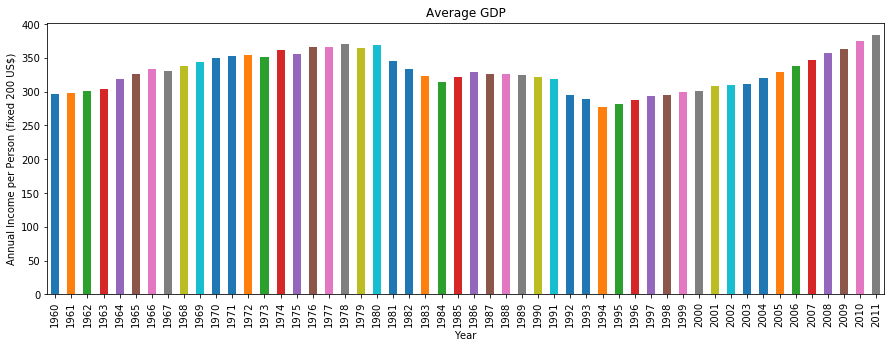

In [22]:
plt.subplots(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Annual Income per Person (fixed 200 US$)')
plt.title('Average GDP')
filter_gdp_df.mean().plot(kind='bar')

Next we will determine the which country has had the largest average annual increase in GDP over the data period.

In [23]:
largest_inc = 0
index = 0
i = 0
while (i <= 51):
    if ((filter_gdp_df.iloc[1,52]-filter_gdp_df.iloc[1,1])/51 > largest_inc):
        largest_inc = (filter_gdp_df.iloc[1,52]-filter_gdp_df.iloc[1,1])/51
        index = i
    i += 1
print('{} had the largest average annual increase at {}% per year'.format(filter_gdp_df.iloc[index,0], largest_inc))

Bangladesh had the largest average annual increase at 2.373980878431372% per year


### What is the relation between GDP and School Attendance?

In [24]:
# Create lists of GDP and School Attendance (Male and Female) in order to prepare a plot.
mean_gdp = filter_gdp_df.mean() 
mean_gdp = mean_gdp['1970':] #Shrinks the GDP list to match the years contained in the School dataframes.
mean_school_female = filter_school_female_df.mean()
mean_school_male = filter_school_male_df.mean()
years = list(filter_school_female_df) #Creates a list of years
years = years[1:] #Removes the first entry in the list, which was a descriptor, not a year

We can now create a multi-axis plot to compare the mean trends of GDP and School Attendance (Male and Female) over the years in which there is data for School Attendance. There are a number of Null data points in the School Attendance data set, however as we are taking the mean value of each year these are being ignored.

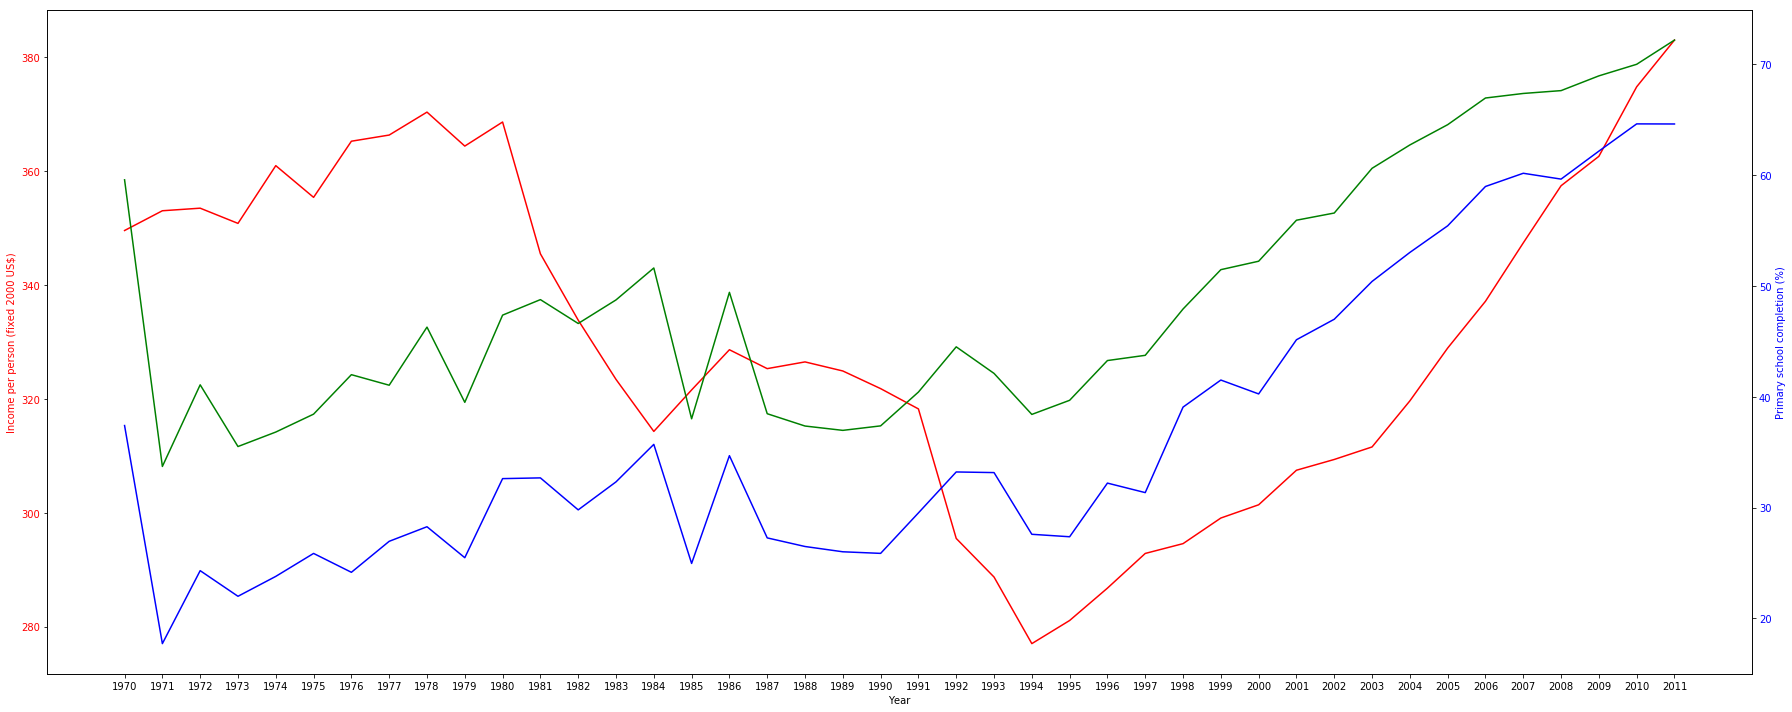

In [25]:
fig, ax1 = plt.subplots(figsize=(25,10))

ax1.set_xlabel('Year')
ax1.set_ylabel('Income per person (fixed 2000 US$)', color='r')
ax1.plot(years, mean_gdp, 'r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()

ax2.set_ylabel('Primary school completion (%)', color='b')
ax2.plot(years, mean_school_female, color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2.plot(years, mean_school_male, color='g')

fig.tight_layout()
plt.legend()
plt.show()

From the above plot, it appears there is a lag in the average attendance of Females compared to Males. We can look at that a bit closer in the following histogram.

Text(0,0.5,'Number of Years')

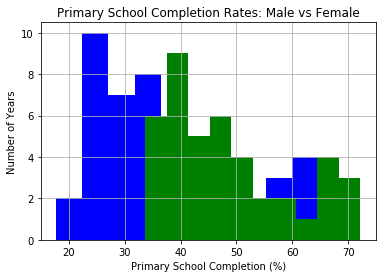

In [32]:
mean_school_female.hist(color='b'), mean_school_male.hist(color='g')
plt.title('Primary School Completion Rates: Male vs Female')
plt.xlabel('Primary School Completion (%)')
plt.ylabel('Number of Years')

The above histogram clearly shows that the mean primary school completion rate is generally about 20% higher for males compared to females in the select countries. This is a glaring discrepency that should be addressed in an effort to improve overall quality of life in these countries.

### What is the relation between GDP and Electricity Consumption?

In [27]:
# Create a list of mean Electricity consumption rates over the Least Developed Countries.
mean_elec = filter_elec_df.mean()
mean_elec = mean_elec['1979':] # Removes the inital Null value at the start of the list.

Text(0,0.5,'Number of years')

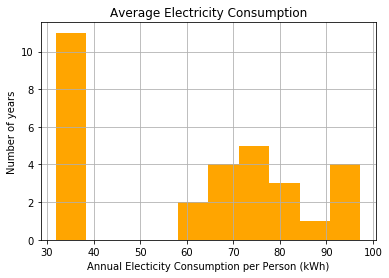

In [28]:
# Create a histogram of Electricity Consumption to get a basic representation of distribution.
mean_elec.hist(color='orange')
plt.title('Average Electricity Consumption')
plt.xlabel('Annual Electicity Consumption per Person (kWh)')
plt.ylabel('Number of years')

From the above histogram, there appears to be a gap between low electricity consumption and average to high consumption. The following scatter plot shows how electricity consumption correlates to average GDP, and should provide further insights to this.

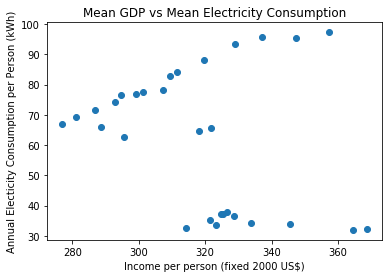

In [29]:
plt.scatter(mean_gdp['1979':'2008'], mean_elec)
plt.title('Mean GDP vs Mean Electricity Consumption')
plt.xlabel('Income per person (fixed 2000 US$)')
plt.ylabel('Annual Electicity Consumption per Person (kWh)')
plt.show()

There appears to be a positive correlation with some of the data, while the lowest electricity consumption data has a flat relationship with GDP.

### What is the relation between GDP and Access to Clean Water?

In [30]:
mean_water_urban = filter_water_urban_df.mean() # Create list of mean Urban Water Usage by year
mean_water_urban = mean_water_urban['1991':'2010'] # Shrink mean Urban Water list to match years in Rural Water data
mean_water_rural = filter_water_rural_df.mean() # Create list of mean Rural Water Usage by year
mean_gdp_water = mean_gdp['1991':'2010'] # Shrink mean GDP list to match years in Rural Water data
years_water = list(filter_water_rural_df) # Create list of years to be used in plots
years_water = years_water[1:] # Remove first, non-numeric, entry

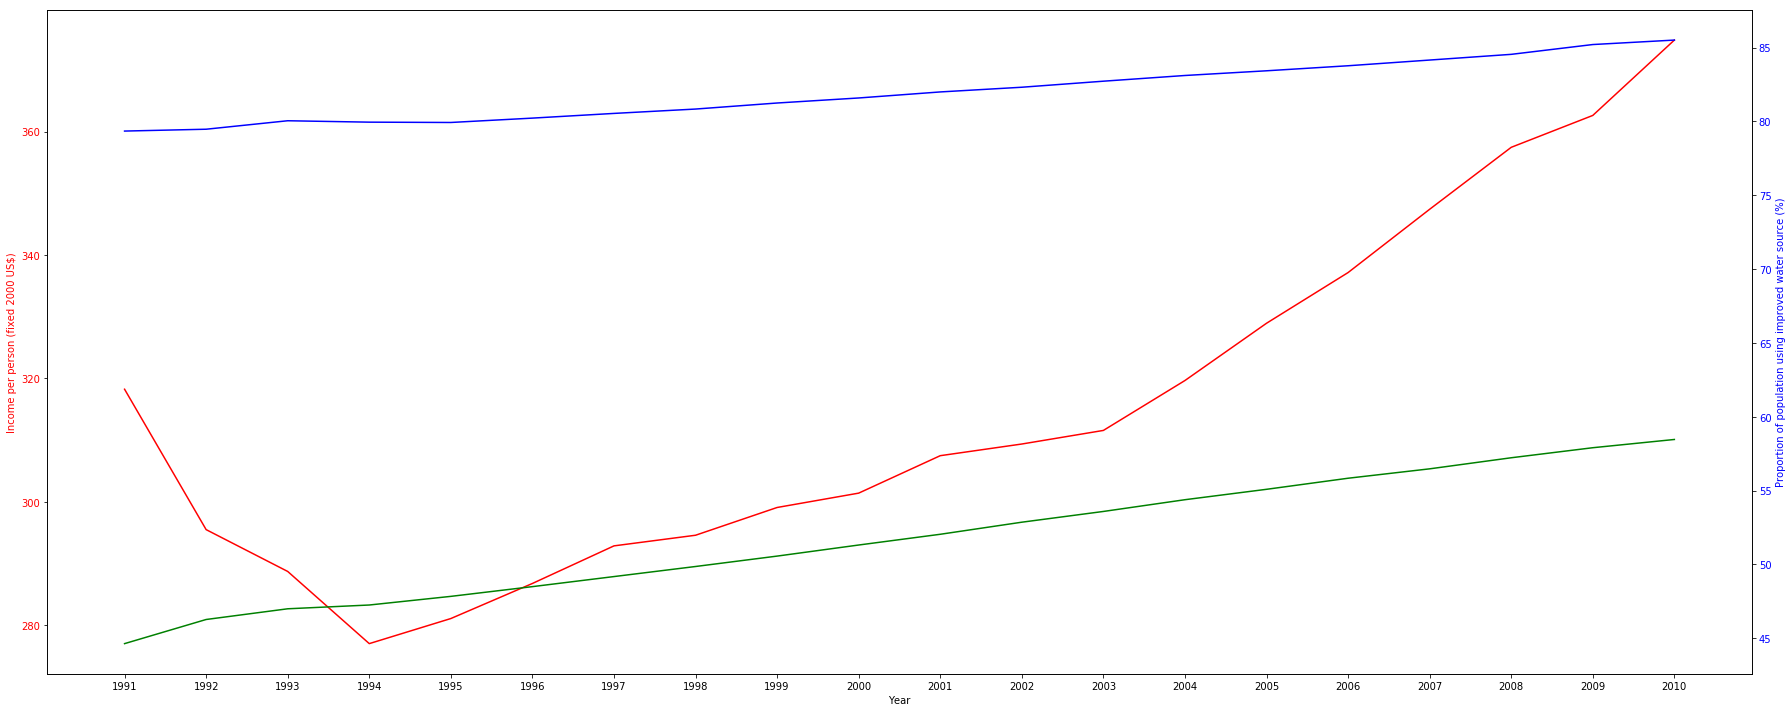

In [31]:
fig, ax1 = plt.subplots(figsize=(25,10))

ax1.set_xlabel('Year')
ax1.set_ylabel('Income per person (fixed 2000 US$)', color='r')
ax1.plot(years_water, mean_gdp_water, 'r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()

ax2.set_ylabel('Proportion of population using improved water source (%)', color='b')
ax2.plot(years_water, mean_water_urban, color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2.plot(years_water, mean_water_rural, color='g')

fig.tight_layout()
plt.legend()
plt.show()

<a id='conclusions'></a>
## Conclusions

Determining how to assist the least developed countries of the world improve the quality of life for the people living there has been a goal of the more developed world for decades. Unfortunately, there has yet to be a simple answer in what the best way to accomplish this would be.

The above investigation outlines a couple potential measure of "success": Earnings per person (GDP), and Education.
It was shown that these measures generally tracked each other, which is intuitive, but is difficult to determine which is a better measure of success. The rest of the investigation focused on GDP, as that is a more common frame of reference and had better data available.

For education, while overall percentage of children completing primary school is increasing, there is a consistent discrepency between the amount of males and females. The lower percentage of females completing primary school is an issue in equality which should be addressed in order for these countries to truly improve their quality of life.

As for the usage of electricity and GDP, there appears to be a generally strong correlation between the two. However, there is a subset of data where a low electricity consumption does not appear to be correlated to GDP. This is an interesting finding which would need to be investigated further. Additionally, although these variables appear to be correlated, it is unknown whether increased electricity consumption results in an increased GDP, the other way around, or if they unrelated but both generally increasing over time.

Access to improved drinking water has steadily been increasing over time in both rural and urban environments, in roughly the same rate. From the above plot, it is again promising to see both GDP and access to improved water increasing over time, however there does not appear to be a direct correlation due to the higher variability in GDP not being mirrored by water access.